In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("DelayedFlights.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [6]:
df.isna().count()

Unnamed: 0           1936758
Year                 1936758
Month                1936758
DayofMonth           1936758
DayOfWeek            1936758
DepTime              1936758
CRSDepTime           1936758
ArrTime              1936758
CRSArrTime           1936758
UniqueCarrier        1936758
FlightNum            1936758
TailNum              1936758
ActualElapsedTime    1936758
CRSElapsedTime       1936758
AirTime              1936758
ArrDelay             1936758
DepDelay             1936758
Origin               1936758
Dest                 1936758
Distance             1936758
TaxiIn               1936758
TaxiOut              1936758
Cancelled            1936758
CancellationCode     1936758
Diverted             1936758
CarrierDelay         1936758
WeatherDelay         1936758
NASDelay             1936758
SecurityDelay        1936758
LateAircraftDelay    1936758
dtype: int64

In [7]:
# correcting dates formate
df['DepTime'] = df.DepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRSDepTime'] = df.CRSDepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['ArrTime'] = df.ArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRSArrTime'] = df.CRSArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)

In [9]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,0754,0735,1002,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,0628,0620,0804,0750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940,1915,2121,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


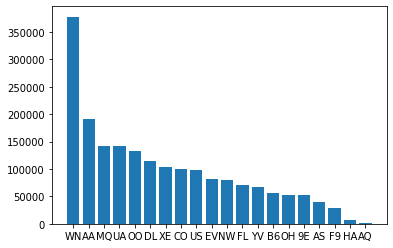

In [12]:
airlines = df.UniqueCarrier.value_counts()
plt.bar(airlines.index, airlines);

In [16]:
df.Cancelled.value_counts()

0    1936125
1        633
Name: Cancelled, dtype: int64

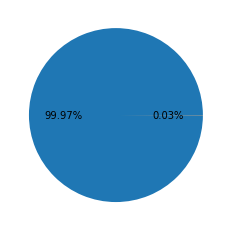

In [17]:
plt.pie(df.Cancelled.value_counts(), autopct='%.2f%%');


In [121]:
df.CancellationCode.value_counts()

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

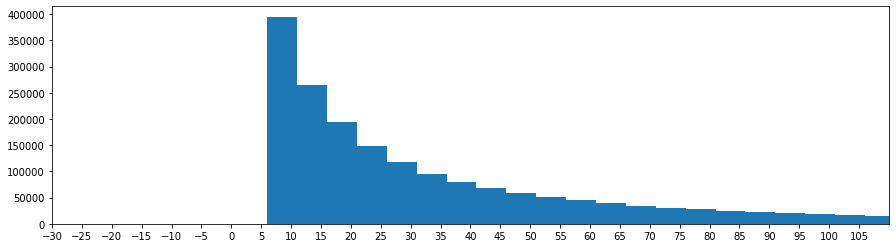

In [20]:
plt.figure(figsize=[15,4])

step = 5
x_min, x_max = -30, 110
bin_edges = np.arange(df.DepDelay.min()-step, df.DepDelay.max()+step, step)
plt.hist(df.DepDelay, bins=bin_edges)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step));

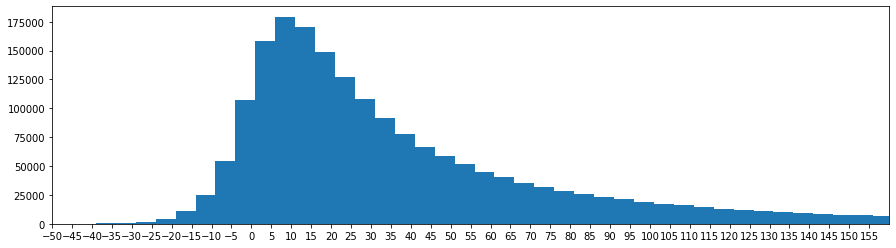

In [22]:
plt.figure(figsize=[15,4])

step = 5
x_min, x_max = -50, 160
bin_edges = np.arange(df.ArrDelay.min()-step, df.ArrDelay.max()+step, step)
plt.hist(df.ArrDelay, bins=bin_edges)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step));

In [79]:
carriers = df.groupby('UniqueCarrier',as_index=False)['DepDelay'].sum()
carriers = pd.DataFrame(carriers)

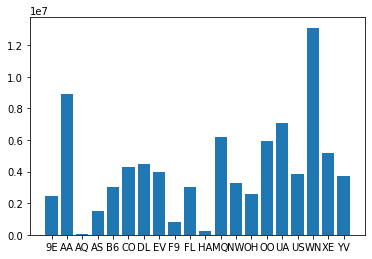

In [81]:
plt.bar(carriers.UniqueCarrier,carriers.DepDelay);

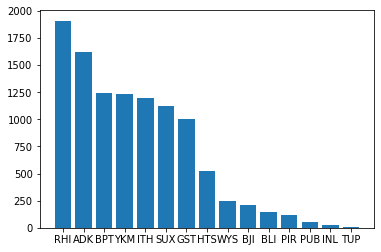

In [98]:
state = df.groupby('Origin',as_index=False)['DepDelay'].sum()
state = pd.DataFrame(state).sort_values('DepDelay',axis = 0,ascending = False).tail(15)
plt.bar(state.Origin,state.DepDelay);

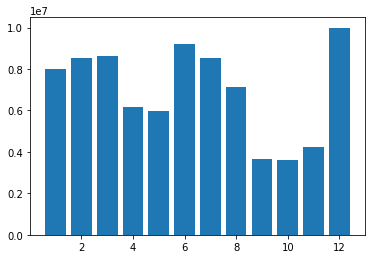

In [107]:
mon = df.groupby('Month',as_index=False)['DepDelay'].sum()
mon = pd.DataFrame(mon).sort_values('DepDelay')
plt.bar(mon.Month,mon.DepDelay);